In [32]:
#import libraries

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [33]:
#load dataset

df = pd.read_csv("supermarket_sales.csv")

In [34]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [35]:
#delete  columns
df = df.drop(['Invoice ID','gross margin percentage'], axis=1)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,30.2085,5.3


In [36]:
#We use the info method to see the data types and whether there is empty data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Tax 5%         1000 non-null   float64
 8   Total          1000 non-null   float64
 9   Date           1000 non-null   object 
 10  Time           1000 non-null   object 
 11  Payment        1000 non-null   object 
 12  cogs           1000 non-null   float64
 13  gross income   1000 non-null   float64
 14  Rating         1000 non-null   float64
dtypes: float64(6), int64(1), object(8)
memory usage: 117.3+ KB


In [37]:
#data visualization
#import libraries

import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
# Group by gender and category and calculate total sales amount
grouped_df = df.groupby(['Gender', 'Product line']).agg({'Total': 'sum'}).reset_index()

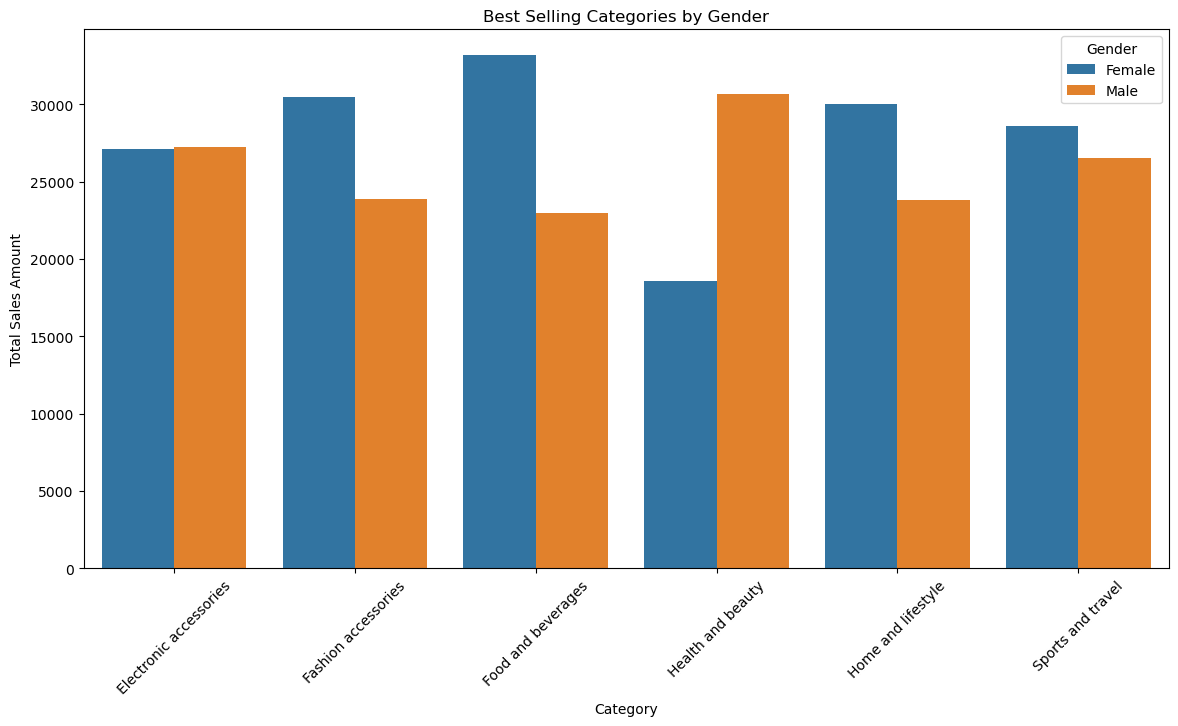

In [39]:
# Visualization

plt.figure(figsize=(14, 7))
sns.barplot(data=grouped_df, x='Product line', y='Total', hue='Gender')

plt.title('Best Selling Categories by Gender')
plt.xlabel('Category')
plt.ylabel('Total Sales Amount')

plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

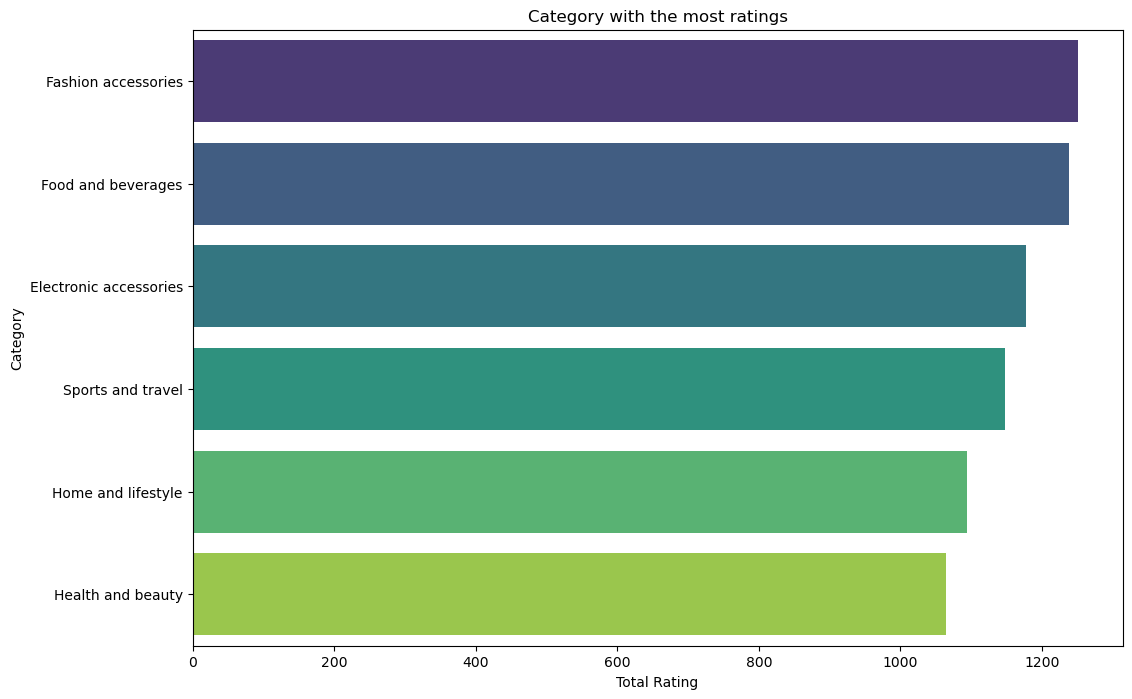

In [40]:
# Group by 'category' and sum the 'rating'
category_votes = df.groupby('Product line')['Rating'].sum().reset_index()

# Sort the categories by the number of votes in descending order
category_votes = category_votes.sort_values(by='Rating', ascending=False)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(x='Rating', y='Product line', data=category_votes, palette='viridis')

# Add titles and labels
plt.title('Category with the most ratings')
plt.xlabel('Total Rating')
plt.ylabel('Category')

# Display the plot
plt.show()

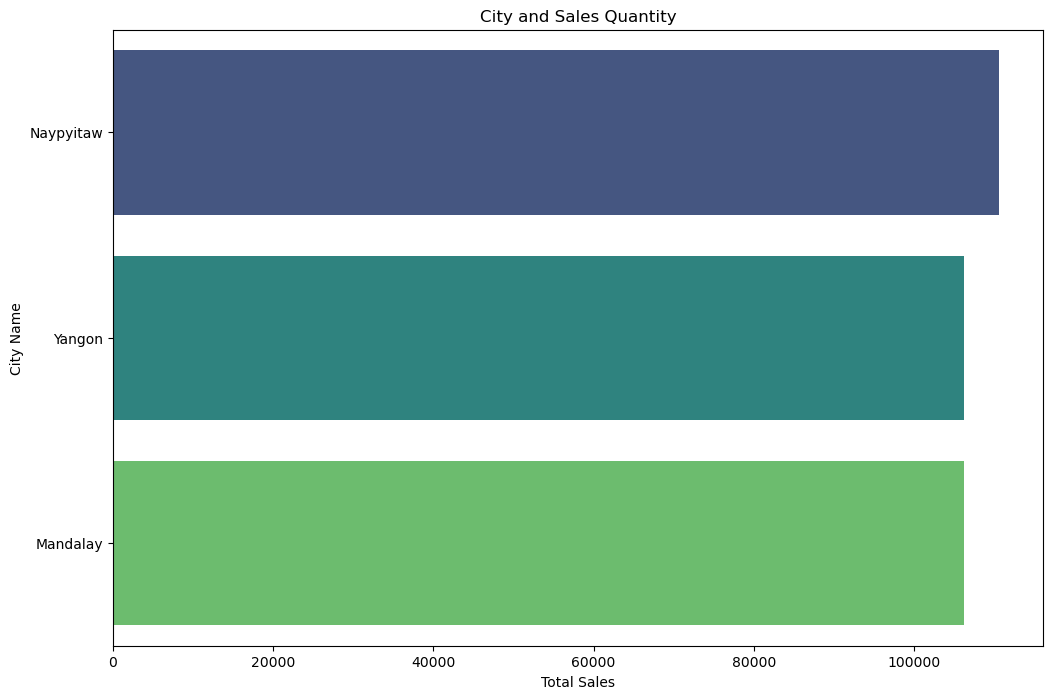

In [41]:
# Find out which city makes the highest amount of sales
city_sales = df.groupby('City')['Total'].sum().reset_index()

# Sort the cities by the number of sales in descending order
category_votes = city_sales.sort_values(by='Total', ascending=False)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(x='Total', y='City', data=category_votes, palette='viridis')

# Add titles and labels
plt.title('City and Sales Quantity')
plt.xlabel('Total Sales')
plt.ylabel('City Name')

# Display the plot
plt.show()

In [42]:
from sklearn.model_selection import train_test_split

#Dividing Data into Training and Testing Sets 

X = df.drop('Rating', axis=1)
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [44]:
X = preprocessor.fit_transform(X)

In [45]:
X.shape

(1000, 620)

In [49]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 620), (200, 620))

In [50]:
#Create an Evaluate Function to give all metrics after model Training

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV


In [51]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [52]:

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.8870
- Mean Absolute Error: 0.5962
- R2 Score: 0.7305
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.8147
- Mean Absolute Error: 2.3213
- R2 Score: -1.5825


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.7085
- Mean Absolute Error: 1.4677
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.7546
- Mean Absolute Error: 1.5168
- R2 Score: -0.0035


Ridge
Model performance for Training set
- Root Mean Squared Error: 1.0959
- Mean Absolute Error: 0.8934
- R2 Score: 0.5886
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.0886
- Mean Absolute Error: 1.7671
- R2 Score: -0.4219


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 1.5310
- Mean Absolute Error: 1.2915
- R2 Score: 0.1970
--------------------

In [53]:
#make a table with models
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
1,Lasso,-0.003483
6,AdaBoost Regressor,-0.011953
3,K-Neighbors Regressor,-0.135512
5,Random Forest Regressor,-0.146360
2,Ridge,-0.421926
4,Decision Tree,-1.039312
0,Linear Regression,-1.582457


In [59]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,7.3,7.416132,-0.116132
737,9.0,13.400573,-4.400573
740,8.5,7.148470,1.351530
660,9.3,7.378601,1.921399
411,6.9,12.090854,-5.190854
...,...,...,...
408,5.5,10.354218,-4.854218
332,5.5,7.812766,-2.312766
208,5.1,7.529518,-2.429518
613,9.0,5.588834,3.411166
